#Informe

El presente informe expone los resultados del análisis realizado sobre la base de datos correspondiente a cuatro tiendas, con el objetivo de evaluar su desempeño financiero y operativo. A partir del estudio de variables clave, se identifican patrones, diferencias y hallazgos relevantes que permiten comparar el rendimiento de cada establecimiento.

Con base en este análisis, se busca determinar de manera objetiva cuál de las tiendas representa la opción más conveniente para su cierre, considerando criterios de rentabilidad y eficiencia, y apoyando así la toma de decisiones estratégicas fundamentadas en datos.

#Desarrollo

## Importación de datos



In [64]:
import pandas as pd
import matplotlib.pyplot as plt #Gráficas

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

nombres = ['tienda1', 'tienda2', 'tienda3', 'tienda4']
tiendas = [tienda1, tienda2, tienda3, tienda4]

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##Reconocimiento de la base de datos

Se asegura la integridad de los datos verificando que no haya nulos.

In [65]:
tienda1.isnull().sum() #No nulos
tienda2.isnull().sum() #No nulos
tienda3.isnull().sum() #No nulos
tienda4.isnull().sum() #No nulos


,0
Producto,0
Categoría del Producto,0
Precio,0
Costo de envío,0
Fecha de Compra,0
Vendedor,0
Lugar de Compra,0
Calificación,0
Método de pago,0
Cantidad de cuotas,0


Como exploración, se revisan los productos vendidos para garantizar que sean únicos, que no haya repetidos, o algunca duplicidad consecuencia de un typo.

In [66]:
tienda1['Producto'].unique() #Hay uno que no hace sentido llamado 'Ciencia de datos con python'
tienda2['Producto'].unique() #Algunos son distintos a los de la tienda1
tienda3['Producto'].unique()
tienda4['Producto'].unique()

array(['Lavavajillas', 'Cama box', 'Balón de baloncesto',
       'Modelado predictivo', 'Auriculares', 'Refrigerador',
       'Guitarra eléctrica', 'Auriculares con micrófono', 'Iphone 15',
       'Mesa de noche', 'Muñeca bebé', 'Dashboards con Power BI',
       'Silla de oficina', 'Kit de bancas', 'Impresora', 'Set de vasos',
       'Mesa de comedor', 'Carrito de control remoto',
       'Cuerda para saltar', 'Estufa', 'Cama king', 'Balón de voleibol',
       'Secadora de ropa', 'Dinosaurio Rex', 'TV LED UHD 4K',
       'Vaso térmico', 'Smart TV', 'Mesa de centro', 'Tablet ABXY',
       'Olla de presión', 'Batería', 'Pandereta',
       'Iniciando en programación', 'Juego de mesa', 'Celular ABXY',
       'Cubertería', 'Armario', 'Bloques de construcción', 'Bicicleta',
       'Asistente virtual', 'Set de ollas', 'Guitarra acústica',
       'Ajedrez de madera', 'Microondas', 'Smartwatch', 'Mochila',
       'Lavadora de ropa', 'Ciencia de datos con Python',
       'Cubo mágico 8x8', 'Silló

Aparece el nombre de un producto que no es fácilmente identificable, por lo que se busca más información sobre el tipo de producto que se vendió para mayor claridad, y asegurar la integridad de los datos.

In [67]:
tienda1.query('Producto == "Ciencia de datos con Python"').sample(5) #Es un libro, por lo que podemos continuar

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
632,Ciencia de datos con Python,Libros,41300.0,0.0,08/02/2022,Blanca Ramirez,Cali,4,Nequi,1,3.43722,-76.52250
1795,Ciencia de datos con Python,Libros,63900.0,1600.0,19/11/2022,Santiago Silva,Pereira,3,Tarjeta de crédito,8,4.81333,-75.69611
1820,Ciencia de datos con Python,Libros,68600.0,8300.0,09/08/2021,Mariana Herrera,Bucaramanga,5,Tarjeta de crédito,1,7.12539,-73.11980
542,Ciencia de datos con Python,Libros,43700.0,2500.0,27/03/2021,Blanca Ramirez,Bogotá,1,Nequi,1,4.60971,-74.08175
1797,Ciencia de datos con Python,Libros,66000.0,9400.0,04/03/2023,Juan Fernandez,Bogotá,3,Tarjeta de crédito,10,4.60971,-74.08175


Así, se evidencia que hablamos de un libro, por lo que el siguiente paso es entender, qué medios de pago hay y si son los mismos en las 4 tiendas.

In [68]:
tienda1['Método de pago'].unique()
all(
    sorted(df['Método de pago'].unique()) ==
    sorted(tienda1['Método de pago'].unique())
    for df in [tienda2, tienda3, tienda4]
) # Todas las tiendas tienen los mismos 4 métodos de pago

True

Como no hubo diferencia significativa entre las operaciones de las diferentes tiendas, ni se encontraron datos atípicos o incongruentes, se prosigue con el análisis relevante para determinar la decisión de qué tienda cerrar. Se empieza por la razón de mayor peso, que es el ingreso de ventas totales para cada tienda.

###1. Análisis de facturación




In [69]:
# Diccionario con el valor de las ventas totales para cada tienda
ingreso_total = {
    nombre: tienda['Precio'].sum()
    for nombre, tienda in zip(nombres, tiendas)
}
ingreso_total

{'tienda1': np.float64(1150880400.0),
 'tienda2': np.float64(1116343500.0),
 'tienda3': np.float64(1098019600.0),
 'tienda4': np.float64(1038375700.0)}

La tienda que genera menor ingreso es la tienda 4, donde encontramos un ingreso total de \$1,038,375,700.0 desde su apertura, seguido de la tienda 3 con \$1,098,019,600.0, luego la tienda 2 con \$ 1,116,343,500.0 y finalmente, la de mayor ingreso, la tienda 1 con \$ 1,150,880,400.0

In [70]:
# Diferencia entre ingresos tomando como base la de menor ingreso
diferencia = {
    nombre: ingreso_total[nombre] - ingreso_total['tienda4']
    for nombre in nombres
}
diferencia

{'tienda1': np.float64(112504700.0),
 'tienda2': np.float64(77967800.0),
 'tienda3': np.float64(59643900.0),
 'tienda4': np.float64(0.0)}

Para evidenciar mejor la diferencia entre los ingresos que han generado las tiendas, se toma como base la tienda de menor ingreso (tienda 4) como base 0. Así, la diferencia entre la segunda de menor ingreso y la primera de menor ingreso es de \$ 59,643,900.0

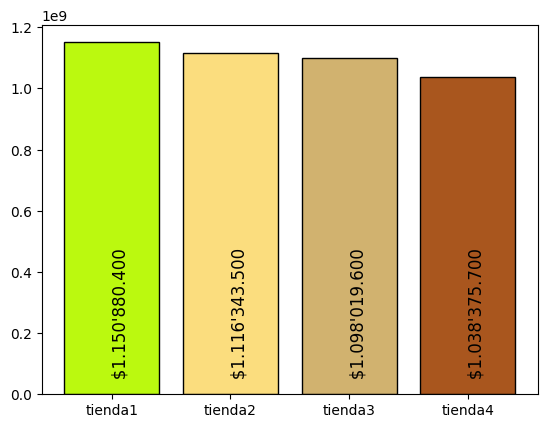

In [71]:
import matplotlib.pyplot as plt
plt.bar(ingreso_total.keys(), ingreso_total.values(), edgecolor='black', facecolor=['#BBF90F', '#FBDD7E', '#D1B26F', '#A9561E'])
plt.text(0, 0, "   $1.150'880.400", fontsize=12, color='black', rotation='vertical', verticalalignment='bottom')
plt.text(1, 0, "   $1.116'343.500", fontsize=12, color='black', rotation='vertical', verticalalignment='bottom')
plt.text(2, 0, "   $1.098'019.600", fontsize=12, color='black', rotation='vertical', verticalalignment='bottom')
plt.text(3, 0, "   $1.038'375.700", fontsize=12, color='black', rotation='vertical', verticalalignment='bottom')
plt.show()

En el gráfico se representa el ingreso total que han tenido las 4 tiendas, desde su apertura.
Por otro lado, el ingreso no es el único que prima, si no el crecimiento que ha presentado, por lo que primero se asegura de que las fechas en la base de datos están en un formato legible de la siguiente manera:

In [72]:
import datetime as dt
# Se asegura que las fechas estén en un formato legible
for tienda in tiendas:
  tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y')

Luego, se obtienen las ventas anuales de cada una de las tiendas, para ver su crecimiento anual.

In [73]:
#Luego, se obtiene las ventas anuales
ventas_anuales = {
    nombre: tienda.groupby(tienda['Fecha de Compra'].dt.year)['Precio'].sum()
    for nombre, tienda in zip(nombres, tiendas)
}
ventas_anuales

{'tienda1': Fecha de Compra
 2020    368933200.0
 2021    362120800.0
 2022    316565600.0
 2023    103260800.0
 Name: Precio, dtype: float64,
 'tienda2': Fecha de Compra
 2020    320466600.0
 2021    351215500.0
 2022    358226500.0
 2023     86434900.0
 Name: Precio, dtype: float64,
 'tienda3': Fecha de Compra
 2020    321707500.0
 2021    362954400.0
 2022    350438300.0
 2023     62919400.0
 Name: Precio, dtype: float64,
 'tienda4': Fecha de Compra
 2020    330847700.0
 2021    347823600.0
 2022    302221500.0
 2023     57482900.0
 Name: Precio, dtype: float64}

A modo de facilitar la comprensión de las cifras, se crea una gráfica con el crecimiento anual de las 4 tiendas.

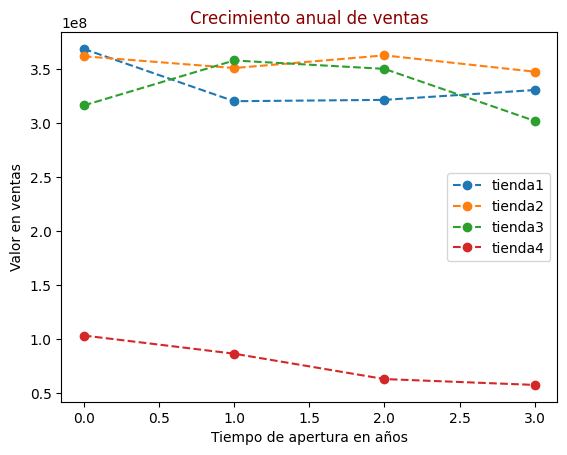

In [74]:
from numpy import size
#Para finalmente poder graficar el crecimiento anual
fig, ax = plt.subplots()
ax.plot(ventas_anuales.values(), marker='o', linestyle='dashed')
legend = nombres
ax.legend(legend)
ax.set_xlabel('Tiempo de apertura en años')
ax.set_ylabel('Valor en ventas')
ax.set_title('Crecimiento anual de ventas', color='darkred')
plt.show()

Como se puede evidenciar, nuevamente, la tienda 4 no solo es la de menor ingreso desde su apertura, si no, presenta un crecimiento negativo, que a pesar de ser menor que el de la tienda 2 ha sido constante.

### 2. Ventas por categoría

Se continúa con otros ítems a revisar, empezando con las ventas por categoría para conocer las categoría más populares por tienda.

In [75]:
# Valor de ventas totales por categoría
ventas_por_categoria = {
    nombre: tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
    for nombre, tienda in zip(nombres, tiendas)
}
ventas_por_categoria

{'tienda1': Categoría del Producto
 Electrónicos               429493500.0
 Electrodomésticos          363685200.0
 Muebles                    187633700.0
 Instrumentos musicales      91299000.0
 Deportes y diversión        39290000.0
 Juguetes                    17995700.0
 Artículos para el hogar     12698400.0
 Libros                       8784900.0
 Name: Precio, dtype: float64,
 'tienda2': Categoría del Producto
 Electrónicos               410831100.0
 Electrodomésticos          348567800.0
 Muebles                    176426300.0
 Instrumentos musicales     104990300.0
 Deportes y diversión        34744500.0
 Juguetes                    15945400.0
 Artículos para el hogar     14746900.0
 Libros                      10091200.0
 Name: Precio, dtype: float64,
 'tienda3': Categoría del Producto
 Electrónicos               410775800.0
 Electrodomésticos          329237900.0
 Muebles                    201072100.0
 Instrumentos musicales      77380900.0
 Deportes y diversión        3559

Se encuentra que la popularidad de las categorías es la misma para cualquier tienda, siguiendo el mismo orden, empezando por Electrónicos y terminando en Libros, esto, en facturación representada para la tienda, para facilitar su visualización se crea el siguiente gráfico de barras.

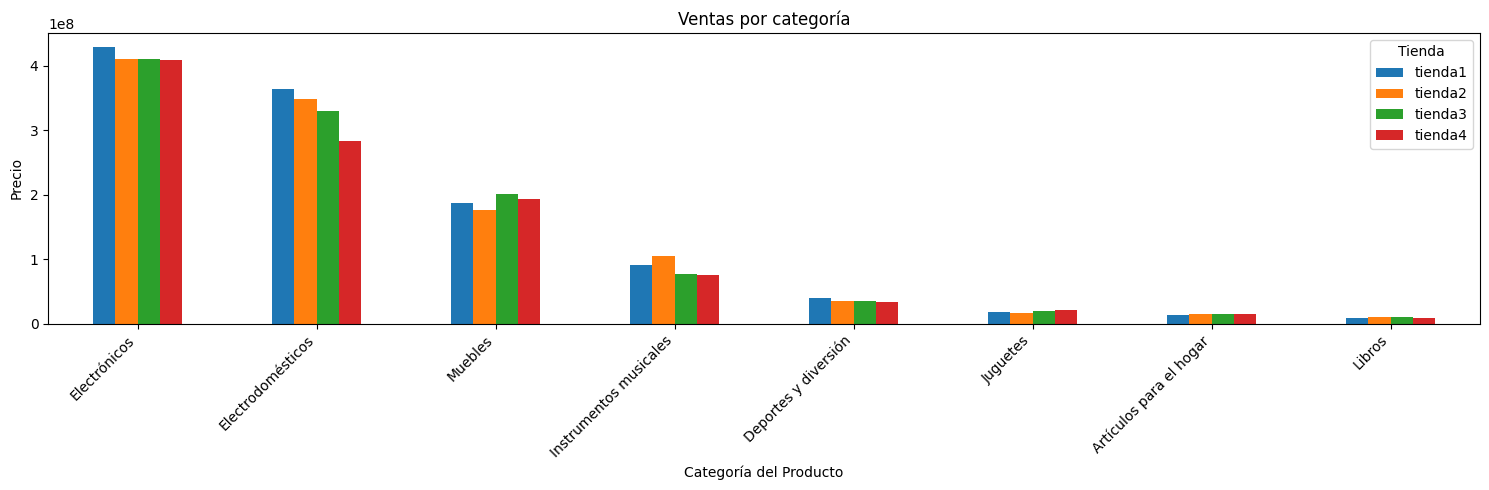

In [76]:
df_ventas_por_categoria = pd.DataFrame(ventas_por_categoria)
df_ventas_por_categoria.plot(kind='bar', figsize=(15, 5))
plt.title('Ventas por categoría')
plt.xlabel('Categoría del Producto')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

Se revisará ahora, la cantidad de elementos vendidos de cada categoría.

In [77]:
# Cantidad de ventas por categoría
ventas_por_categoria = {
    nombre: tienda.groupby('Categoría del Producto').size().sort_values(ascending=False)
    for nombre, tienda in zip(nombres, tiendas)
}
ventas_por_categoria

{'tienda1': Categoría del Producto
 Muebles                    465
 Electrónicos               448
 Juguetes                   324
 Electrodomésticos          312
 Deportes y diversión       284
 Instrumentos musicales     182
 Libros                     173
 Artículos para el hogar    171
 dtype: int64,
 'tienda2': Categoría del Producto
 Muebles                    442
 Electrónicos               422
 Juguetes                   313
 Electrodomésticos          305
 Deportes y diversión       275
 Instrumentos musicales     224
 Libros                     197
 Artículos para el hogar    181
 dtype: int64,
 'tienda3': Categoría del Producto
 Muebles                    499
 Electrónicos               451
 Juguetes                   315
 Electrodomésticos          278
 Deportes y diversión       277
 Libros                     185
 Artículos para el hogar    177
 Instrumentos musicales     177
 dtype: int64,
 'tienda4': Categoría del Producto
 Muebles                    480
 Electrónicos  

Aunque la popularidad no es exactamente la misma para cada tienda, se ve una clara tendencia a la popularidad de los muebles, seguido de los productos electrónicos y después los juegos

### 3. Calificación promedio de la tienda


Se busca hallar la calificación promedio de las tiendas, por lo que se hace necesario nuevamente verificar que no hayan valores nulos que afecte el promedio.

In [78]:
# Se asegura de que no existan valores nulos en la columna de calificación
all(
    tienda['Calificación'].isnull().sum() == 0
    for tienda in tiendas
)

True

Como no se halló ninguno, continuamos a la obtención de la media de calificaciones.

In [79]:
# Valoración media por tienda
valoracion_por_tienda = {
    nombre: tienda['Calificación'].mean()
    for nombre, tienda in zip(nombres, tiendas)
}
sorted(valoracion_por_tienda.items(), key=lambda x: x[1], reverse=True) #Para organizarlo en forma de ranking


[('tienda3', np.float64(4.048325561678677)),
 ('tienda2', np.float64(4.037303942348453)),
 ('tienda4', np.float64(3.9957591178965224)),
 ('tienda1', np.float64(3.976685036032217))]

Aunque la de menor calificación es la tienda 1, y es un factor claramente a mejorar, considerando la cantidad de ingresos que genera, se observa nuevamente la tienda 4 ocupando el penúltimo lugar en el ranking de calificaciones promediadas.

### 4. Productos más y menos vendidos

A continuación, se buscan los productos que mayor éxito en ventas en cada una de las tiendas para obtener una perspectiva cualitativa de cada tienda.

In [80]:
recurrencia_productos_mas_vendidos = {
    nombre: tienda.groupby('Producto').size().sort_values(ascending=False).head(5)
    for nombre, tienda in zip(nombres, tiendas)
}
recurrencia_productos_mas_vendidos

{'tienda1': Producto
 Armario             60
 TV LED UHD 4K       60
 Microondas          60
 Secadora de ropa    58
 Mesa de noche       56
 dtype: int64,
 'tienda2': Producto
 Iniciando en programación    65
 Microondas                   62
 Batería                      61
 Pandereta                    58
 Guitarra acústica            58
 dtype: int64,
 'tienda3': Producto
 Kit de bancas      57
 Mesa de comedor    56
 Cama king          56
 Set de ollas       55
 Mesa de noche      55
 dtype: int64,
 'tienda4': Producto
 Cama box                     62
 Cubertería                   59
 Cama king                    56
 Dashboards con Power BI      56
 Carrito de control remoto    55
 dtype: int64}

Cada tienda al parecer tiene sus propios productos populares, no se evidencia una correlación entre las tiendas, a pesar de pertencen al a misma categoría, para su visualización se hace el siguiente diagrama de barras, aunque solo hay 3 productos en común.

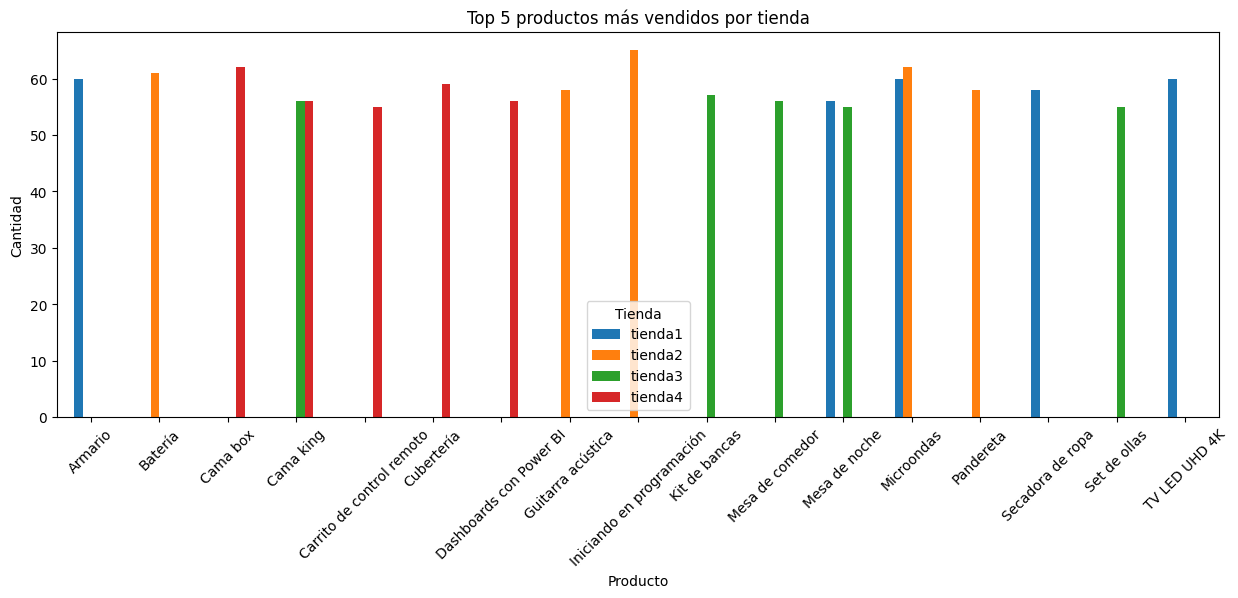

In [81]:
df_top = pd.DataFrame(recurrencia_productos_mas_vendidos).fillna(0)
df_top.plot(kind='bar', figsize=(15, 5))
plt.title('Top 5 productos más vendidos por tienda')
plt.xlabel('Producto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Tienda')
plt.show()


Luego, se encuentran los menos vendidos.

In [82]:
recurrencia_productos_menos_vendidos = {
    nombre: tienda.groupby('Producto').size().sort_values(ascending=False).tail(5)
    for nombre, tienda in zip(nombres, tiendas)
}
recurrencia_productos_menos_vendidos


{'tienda1': Producto
 Mochila                      39
 Pandereta                    36
 Olla de presión              35
 Celular ABXY                 33
 Auriculares con micrófono    33
 dtype: int64,
 'tienda2': Producto
 Auriculares        37
 Sillón             35
 Impresora          34
 Mesa de comedor    34
 Juego de mesa      32
 dtype: int64,
 'tienda3': Producto
 Guitarra eléctrica         38
 Mochila                    36
 Microondas                 36
 Set de vasos               36
 Bloques de construcción    35
 dtype: int64,
 'tienda4': Producto
 Ciencia de datos con Python    38
 Refrigerador                   38
 Guitarra acústica              37
 Armario                        34
 Guitarra eléctrica             33
 dtype: int64}

Nuevamente, no se ve una correlación, entre el producto y alguna tiendas, todas parecen tener sus propios productos extrella y de menor venta.

### 5. Envío promedio por tienda

Finalmente, se encuentra el costo de envío promedio del que se encarga en cliente en pagar.

In [83]:
costo_envio_promedio = {
    nombre: round(tienda['Costo de envío'].mean(), 2)
    for nombre, tienda in zip(nombres, tiendas)
}
sorted(costo_envio_promedio.items(), key=lambda x: x[1], reverse=True)


[('tienda1', np.float64(26018.61)),
 ('tienda2', np.float64(25216.24)),
 ('tienda3', np.float64(24805.68)),
 ('tienda4', np.float64(23459.46))]

Se encuentra en orden el valor promedio de envío que tiene cada tienda, siendo, la tienda 4 la de menor valor, lo cual hace sentido, ya que es la de menores ventas, y en general, las tiendas se encuentran en el mismo ranking de promedio de costo de envío e ingreso total.

### 6. Mapa de dispersión de compras por tienda.




In [157]:
recurrencia_ubicacion = {
    nombre: tienda.groupby(['lat', 'lon']).size()
    for nombre, tienda in zip(nombres, tiendas)
}
df_recurrencia_ubicacion = pd.DataFrame(recurrencia_ubicacion)
df_recurrencia_ubicacion

,,tienda1,tienda2,tienda3,tienda4
lat,lon,,,,
-4.21528,-69.94056,32,34,41,35
1.21361,-77.28111,23,25,16,30
2.92730,-75.28189,6,6,10,18
3.43722,-76.52250,283,222,248,254
3.86530,-67.92390,5,2,4,3
4.14200,-73.62664,11,6,5,7
4.53389,-75.68111,14,4,7,3
4.57937,-74.21682,5,4,6,4
4.60971,-74.08175,984,985,983,991


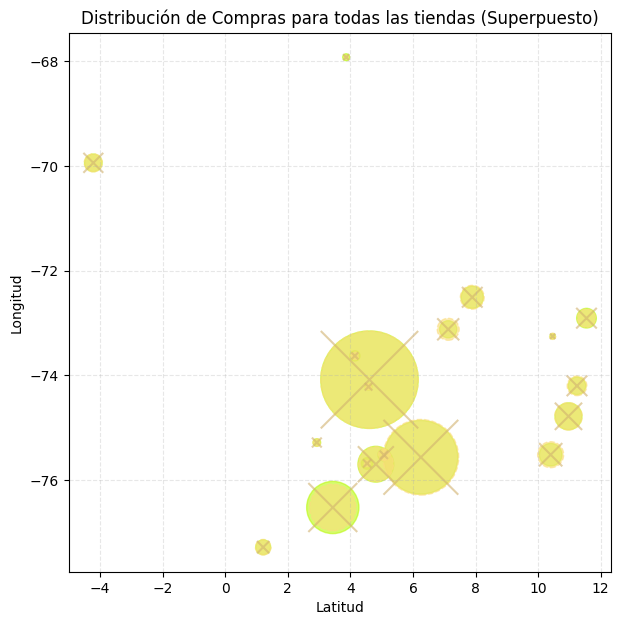

In [186]:
df_plot = df_recurrencia_ubicacion.reset_index()
colores = ['#BBF90F', '#FBDD7E', '#D1B26F', '#A9561E']

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x=df_plot['lat'],
           y=df_plot['lon'],
           s=df_plot['tienda1']*5,
           color=colores[0],
           alpha=0.6)

ax.scatter(x=df_plot['lat'],
           y=df_plot['lon'],
           s=df_plot['tienda2']*5,
           color=colores[1],
           alpha=0.6,
           linestyle = '--')

ax.scatter(x=df_plot['lat'],
           y=df_plot['lon'],
           s=df_plot['tienda3']*5,
           color=colores[2],
           alpha=0.6,
           marker='x')

ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
ax.set_title('Distribución de Compras para todas las tiendas (Superpuesto)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

Se ha revisado la ubicación de las compras que hacen los clientes a las tiendas de Juan, se ve que en todas las tiendas tiene compras en ubicaciones similares en proporciones similares sin importar la tienda en cuestión, por lo que al no saber cuál es la ubicación de las tiendas, no se puede corroborar si las ventas están relacionadas con la ubicación de la tiendas, sin embargo, probablemente se vea afectada.

#Conclusión

Se recomienda al señor Juan, si realmente desea vender toda una tienda, la que causa menor impacto en la rentabilidad de sus negocios sería la tienda 4, esto debido a que su ingreso es mucho menor al de las demás tiendas y su tendencia progresiva a decrecer en ventas, por último, si no estrictamente necesaria su venta, se le recomienda disminuir el tamaño del negocio dejando únicamente muebles, electrónicos y juguetes dada su popularidad y ventas competitivas con las demás tiendas.